In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

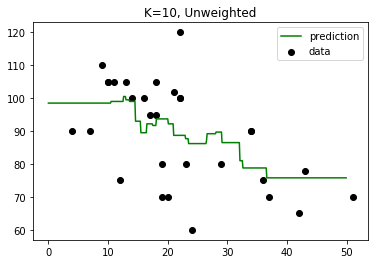

In [2]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

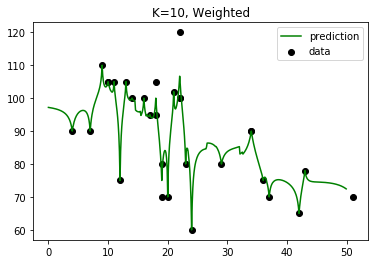

In [3]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [4]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


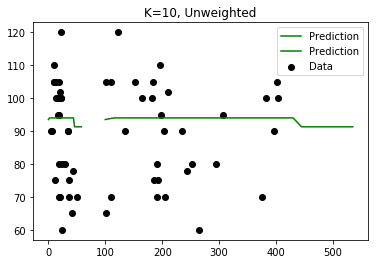

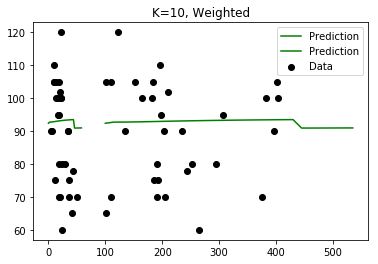

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)


In [5]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = np.array(music[['duration','loudness']])
Y = np.column_stack([music.bpm,music.bpm])
knn.fit(X, Y)

# Set up our prediction line.
T_x1 = np.arange(0, 60, 2)
T_x2 = np.arange(100, 550, 15)
T = np.column_stack([T_x1, T_x2])
# T = np.arange(0, 450, 15)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = np.array(music[['duration','loudness']])
knn_w.fit(X, Y)

# Set up our prediction line.
T_x1 = np.arange(0, 60, 2)
T_x2 = np.arange(100, 550, 15)
T = np.column_stack([T_x1, T_x2])

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

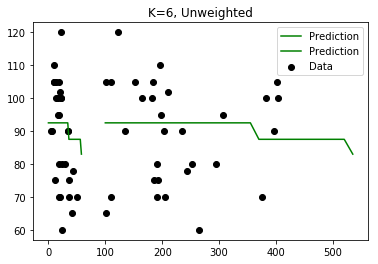

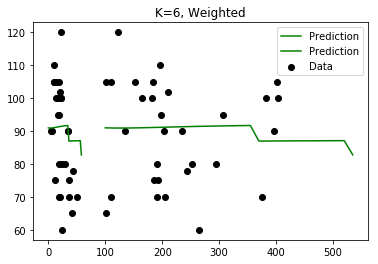

Unweighted Accuracy: -0.51 (+/- 0.81)
Weighted Accuracy: -0.37 (+/- 0.88)


In [6]:

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
X = np.array(music[['duration','loudness']])
Y = np.column_stack([music.bpm,music.bpm])
knn.fit(X, Y)

# Set up our prediction line.
T_x1 = np.arange(0, 60, 2)
T_x2 = np.arange(100, 550, 15)
T = np.column_stack([T_x1, T_x2])
# T = np.arange(0, 450, 15)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=6, Unweighted')
plt.show()

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance')
X = np.array(music[['duration','loudness']])
knn_w.fit(X, Y)

# Set up our prediction line.
T_x1 = np.arange(0, 60, 2)
T_x2 = np.arange(100, 550, 15)
T = np.column_stack([T_x1, T_x2])

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=6, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

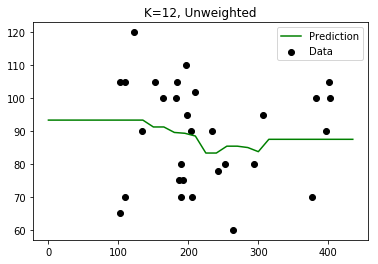

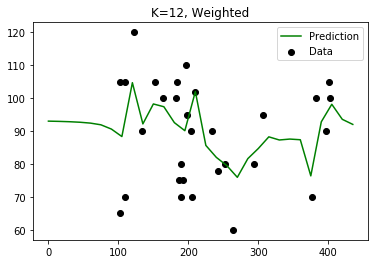

Unweighted Accuracy: -0.39 (+/- 0.76)
Weighted Accuracy: -0.76 (+/- 0.75)


In [7]:
#Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=12)
X = np.array(music[['duration']])
Y = music.bpm.values.reshape(30,1)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 450, 15)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=12, Unweighted')
plt.show()

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=12, weights='distance')
X = np.array(music[['duration']])
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 450, 15)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=12, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
